# 🏅 Olympics Data Analysis — SQL for Data Science Capstone Project

**Author:** Bibhudendu Behera  
**Client:** SportsStats (Sports Analytics Firm)  
**Dataset:** `athlete_events.csv` (1896–2016)  
**Tools:** Python, Pandas, SQLite, Matplotlib, Seaborn, SQL

---

## 🧭 1. Project Overview

### 📌 Objective
Analyze 120+ years of Olympic history to uncover medal trends, gender participation evolution, top performing sports and nations, and athlete demographics.

### 🧑‍💻 Client & Audience
- **Client:** SportsStats — Sports analytics company  
- **Audience:** Data scientists, sports journalists, performance analysts  

### 🧠 Research Questions
1. How have total Olympic medals evolved over time across different sports and countries?  
2. How has gender participation changed throughout Olympic history?  
3. Which sports and nations consistently dominate medal counts?

### 📊 Hypotheses
- Athletics and Swimming dominate medal counts due to event diversity.  
- Female participation has grown significantly, especially post-1980.  
- USA, USSR, and China consistently rank among top medal-winning nations.


In [1]:
# ============================================================
# 📦 Step 1 — Import Required Libraries
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
plt.style.use('seaborn-v0_8')
sns.set_theme(style='whitegrid', palette='Set2')

# ============================================================
# 📂 Step 2 — Load the Dataset
# ============================================================
file_path = 'athlete_events.csv'
df = pd.read_csv(file_path)
df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## 🧼 2. Data Inspection & Cleaning
Before diving into SQL and analysis, let's inspect and clean the data to ensure quality and consistency.


In [2]:
# ============================================================
# Step 3 — Inspect Data
# ============================================================
print("Shape:", df.shape)
df.info()
df.describe()

# Missing values overview
print("\nMissing Values:")
print(df.isnull().sum().sort_values(ascending=False).head(10))


Shape: (271116, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB

Missing Values:
Medal     231333
Weight     62875
Height     60171
Age         9474
Sex            0
ID             0
Name           0
Team           0
NOC   

In [3]:
# ============================================================
# Step 4 — Handle Missing Data
# ============================================================

# Impute Age with median
df['Age_imputed'] = df['Age'].fillna(df['Age'].median())

# Retain Height & Weight missing as-is (large percentage)
# Keep raw Medal NaNs (non-medalists)

# Create helper datasets
medal_data = df[df['Medal'].notna()].copy()
age_series = df['Age'].dropna()


In [4]:
# ============================================================
# Step 5 — Final Data Validation
# ============================================================
print("Shape before duplicate removal:", df.shape)
print("Duplicate rows:", df.duplicated().sum())

df.drop_duplicates(inplace=True)

print("Shape after duplicate removal:", df.shape)
print("Duplicate rows remaining:", df.duplicated().sum())
print("Unique NOC:", df['NOC'].nunique())
print("Unique Sports:", df['Sport'].nunique())
print("Unique Years:", df['Year'].nunique())


Shape before duplicate removal: (271116, 16)
Duplicate rows: 1385
Shape after duplicate removal: (269731, 16)
Duplicate rows remaining: 0
Unique NOC: 230
Unique Sports: 66
Unique Years: 35


## 🧮 3. Load Data into SQLite for SQL Analysis
We'll load the cleaned dataframe into an in-memory SQLite database to execute real SQL queries directly from Python.


In [5]:
# ============================================================
# Step 6 — Load into SQLite (in-memory)
# ============================================================
conn = sqlite3.connect(':memory:')
df.to_sql('olympics', conn, index=False, if_exists='replace')

print("✅ Data loaded successfully into SQLite")
print("Shape:", df.shape)

# Preview table
pd.read_sql_query("SELECT * FROM olympics LIMIT 5;", conn)


✅ Data loaded successfully into SQLite
Shape: (269731, 16)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Age_imputed
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,24.0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,23.0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,24.0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,34.0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,21.0


## 🥇 4. Medal Trends Over Time
We start by analyzing how the total number of medals has evolved over time.


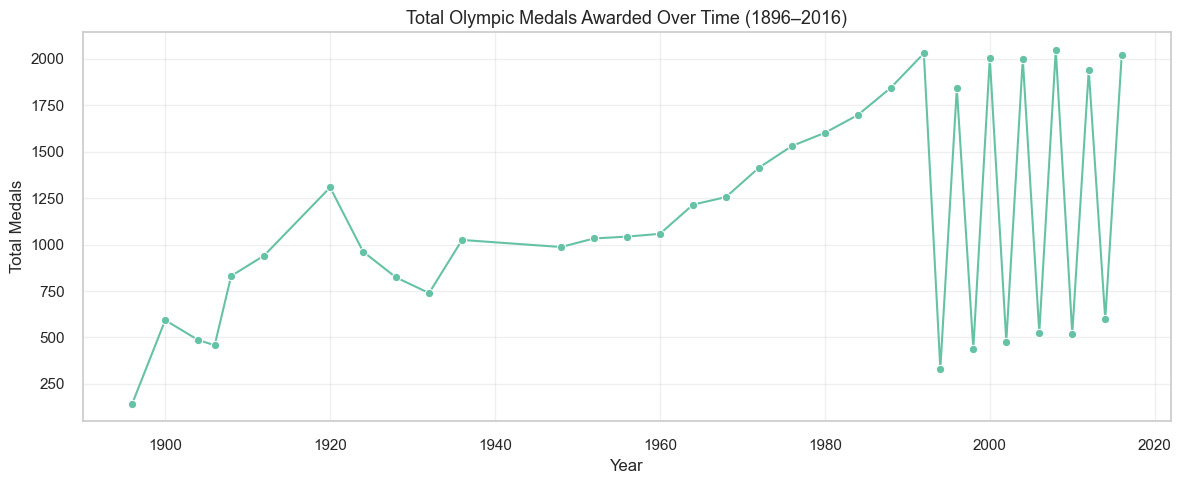

In [6]:
query = """
SELECT Year, COUNT(Medal) AS total_medals
FROM olympics
WHERE Medal IS NOT NULL
GROUP BY Year
ORDER BY Year;
"""
medals_over_time = pd.read_sql_query(query, conn)

plt.figure(figsize=(12,5))
sns.lineplot(data=medals_over_time, x='Year', y='total_medals', marker='o')
plt.title('Total Olympic Medals Awarded Over Time (1896–2016)', fontsize=13)
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## 🏃 5. Medal Trends by Top Sports
We'll identify top sports and visualize their medal trends across Olympic history.


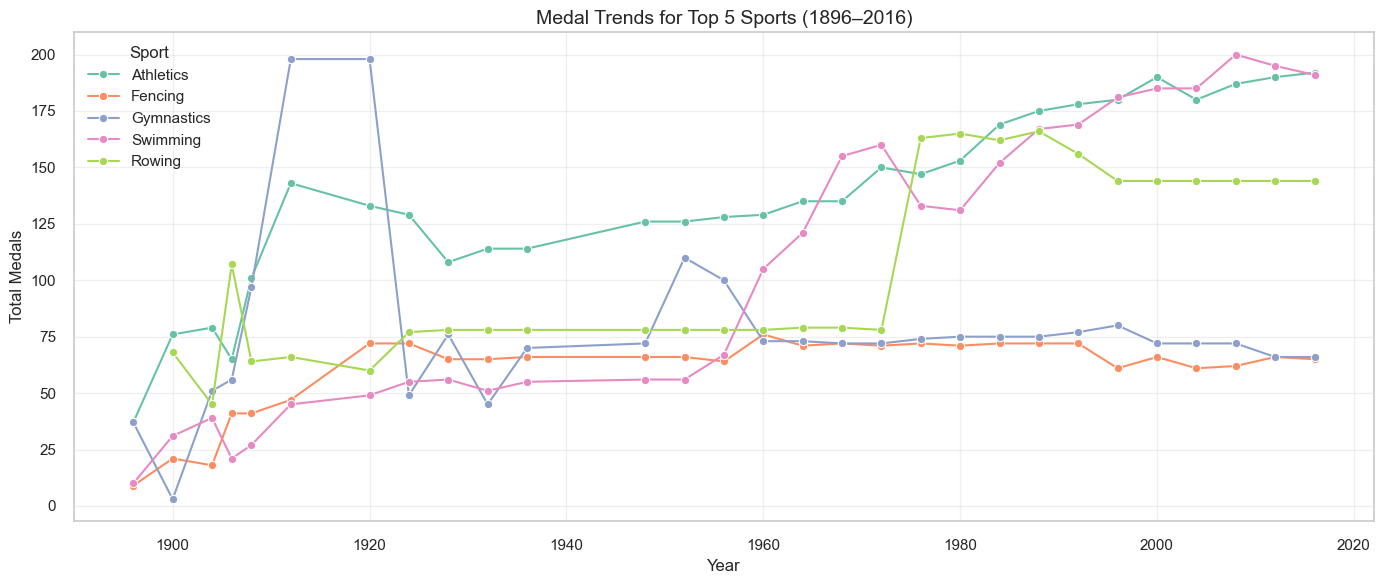

In [7]:
# Top 5 Sports
top_sports = pd.read_sql_query("""
    SELECT Sport, COUNT(Medal) AS total_medals
    FROM olympics
    WHERE Medal IS NOT NULL
    GROUP BY Sport
    ORDER BY total_medals DESC
    LIMIT 5;
""", conn)

top_sport_list = top_sports['Sport'].tolist()

filtered_sports = pd.read_sql_query(f"""
    SELECT Year, Sport, COUNT(Medal) AS total_medals
    FROM olympics
    WHERE Medal IS NOT NULL AND Sport IN ({','.join(["'"+s+"'" for s in top_sport_list])})
    GROUP BY Year, Sport
    ORDER BY Year;
""", conn)

plt.figure(figsize=(14,6))
sns.lineplot(data=filtered_sports, x='Year', y='total_medals', hue='Sport', marker='o')
plt.title('Medal Trends for Top 5 Sports (1896–2016)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.legend(title='Sport')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## 🌍 6. Medal Trends by Top Countries
Let's look at which countries have historically dominated the Olympic medal counts.


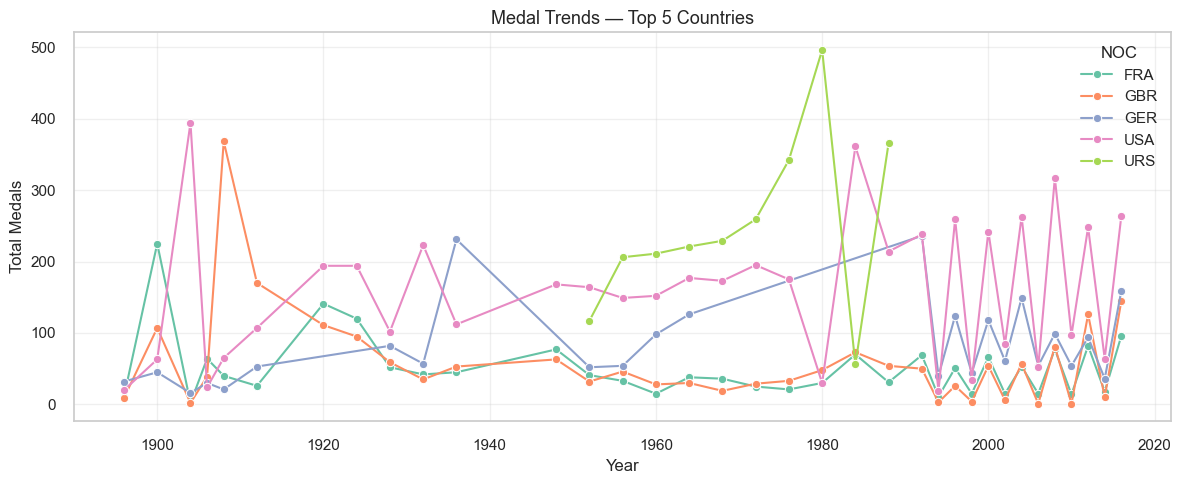

In [8]:
top_countries = pd.read_sql_query("""
    SELECT NOC, COUNT(Medal) AS total_medals
    FROM olympics
    WHERE Medal IS NOT NULL
    GROUP BY NOC
    ORDER BY total_medals DESC
    LIMIT 5;
""", conn)

country_list = top_countries['NOC'].tolist()

medals_by_country = pd.read_sql_query(f"""
    SELECT Year, NOC, COUNT(Medal) AS total_medals
    FROM olympics
    WHERE Medal IS NOT NULL AND NOC IN ({','.join(["'"+c+"'" for c in country_list])})
    GROUP BY Year, NOC
    ORDER BY Year;
""", conn)

plt.figure(figsize=(12,5))
sns.lineplot(data=medals_by_country, x='Year', y='total_medals', hue='NOC', marker='o')
plt.title('Medal Trends — Top 5 Countries', fontsize=13)
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.legend(title='NOC')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## 🚹🚺 7. Gender Participation Over Time
We’ll analyze how gender participation has evolved since 1896.


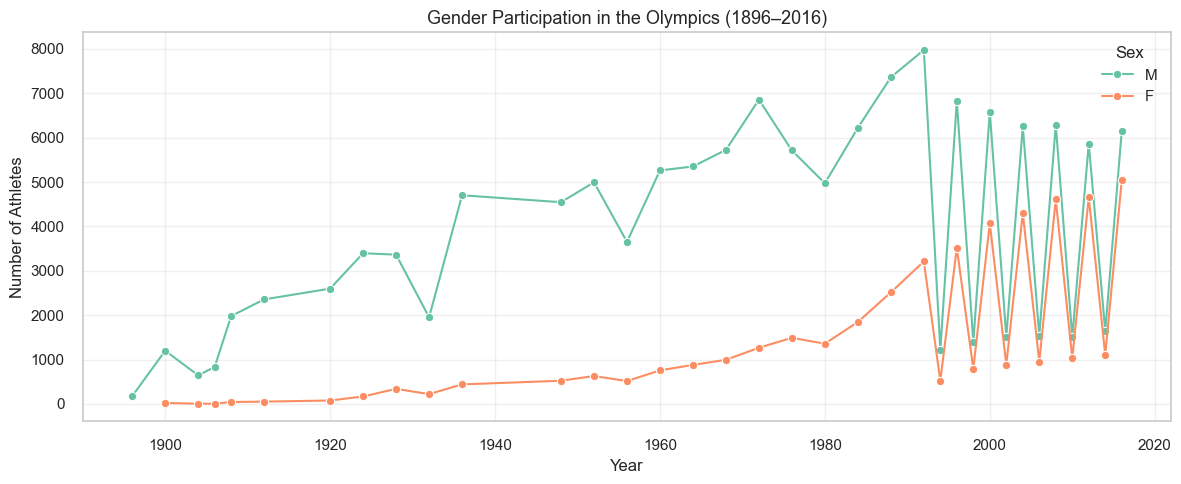

In [9]:
query = """
SELECT Year, Sex, COUNT(DISTINCT ID) AS total_athletes
FROM olympics
GROUP BY Year, Sex
ORDER BY Year, Sex;
"""
gender_participation = pd.read_sql_query(query, conn)

plt.figure(figsize=(12,5))
sns.lineplot(data=gender_participation, x='Year', y='total_athletes', hue='Sex', marker='o')
plt.title('Gender Participation in the Olympics (1896–2016)', fontsize=13)
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## 🏆 8. Top 10 Sports & Countries by Total Medals
Here, we'll visualize the top sports and countries by medal count in Olympic history.


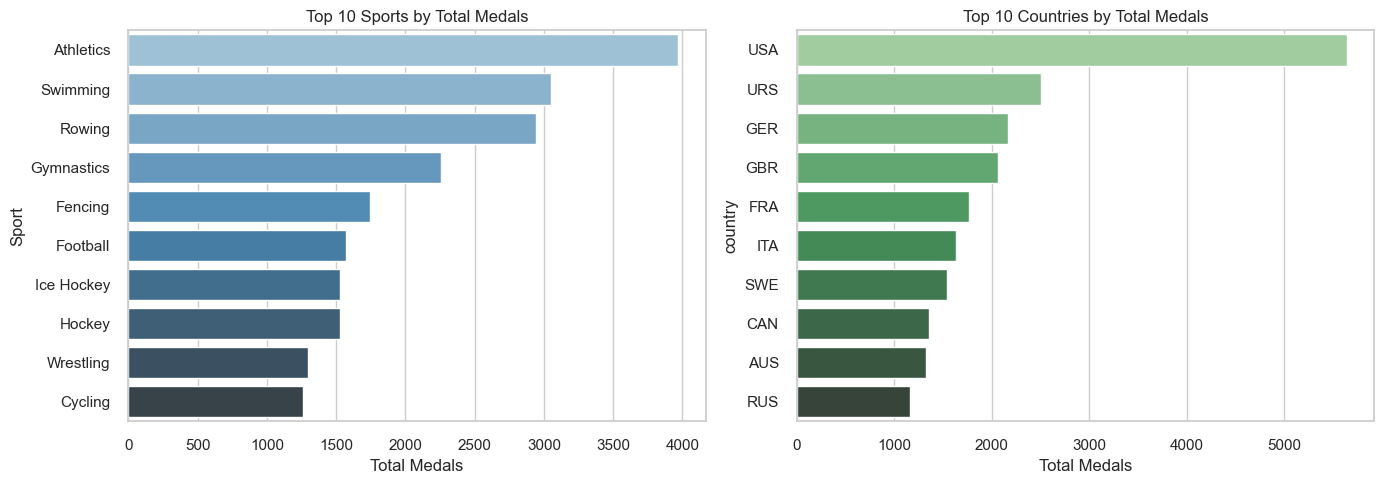

In [10]:
top_sports_all = pd.read_sql_query("""
    SELECT Sport, COUNT(Medal) AS total_medals
    FROM olympics
    WHERE Medal IS NOT NULL
    GROUP BY Sport
    ORDER BY total_medals DESC
    LIMIT 10;
""", conn)

top_countries_all = pd.read_sql_query("""
    SELECT NOC AS country, COUNT(Medal) AS total_medals
    FROM olympics
    WHERE Medal IS NOT NULL
    GROUP BY NOC
    ORDER BY total_medals DESC
    LIMIT 10;
""", conn)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(ax=axes[0], data=top_sports_all, y='Sport', x='total_medals', palette='Blues_d')
axes[0].set_title('Top 10 Sports by Total Medals')
axes[0].set_xlabel('Total Medals')

sns.barplot(ax=axes[1], data=top_countries_all, y='country', x='total_medals', palette='Greens_d')
axes[1].set_title('Top 10 Countries by Total Medals')
axes[1].set_xlabel('Total Medals')

plt.tight_layout()
plt.show()


## 🧓 9. Age Distribution of Athletes
We'll explore the age characteristics of athletes and medalists to identify trends.


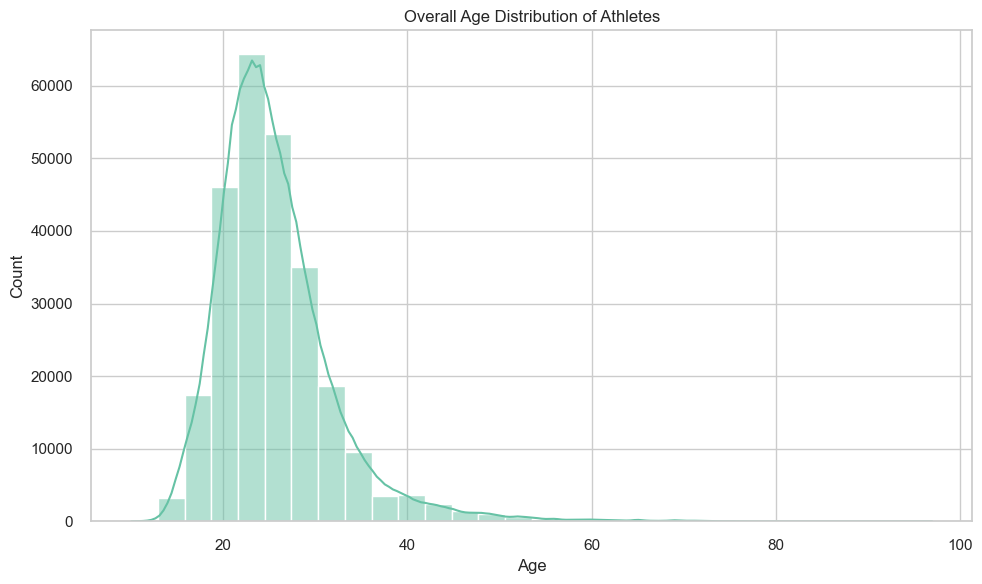

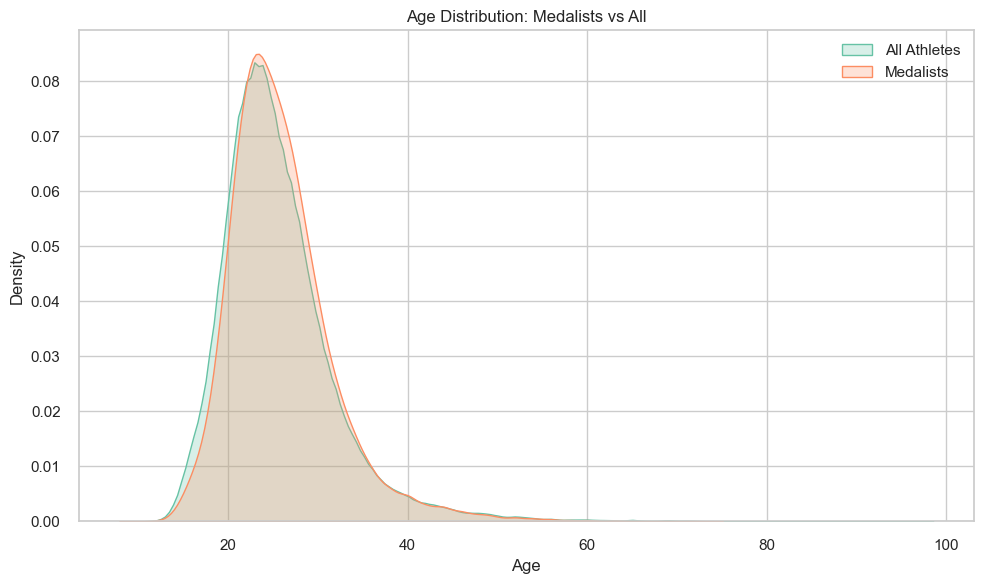

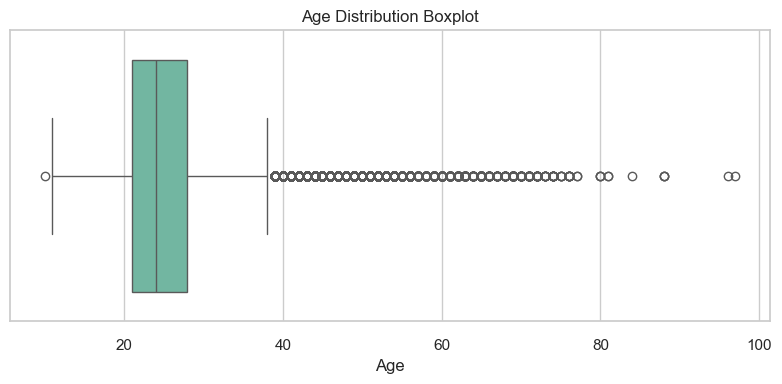

In [11]:
medalist_age = medal_data['Age'].dropna()

plt.figure(figsize=(10,6))
sns.histplot(age_series, bins=30, kde=True)
plt.title('Overall Age Distribution of Athletes')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.kdeplot(x=age_series, label='All Athletes', fill=True)
sns.kdeplot(x=medalist_age, label='Medalists', fill=True)
plt.title('Age Distribution: Medalists vs All')
plt.xlabel('Age')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=age_series)
plt.title('Age Distribution Boxplot')
plt.tight_layout()
plt.show()


## 🧱 10. ERD & Project Context

Below is the **Entity-Relationship Diagram (ERD)** for the Olympic dataset.

It shows the relationship between key entities:
- Athletes  
- Games  
- Sports & Events  
- NOCs (Countries)  
- Medals


In [12]:
from IPython.display import display, HTML

display(HTML("""
<div style="text-align: center; margin-top: 10px; margin-bottom: 10px;">
    <img src="olympics_erd_final.png" alt="Olympics ERD Diagram"
         style="width: 80%; max-width: 900px; border: 1px solid #ddd; border-radius: 8px;">
    <p style="font-size: 13px; color: #555; margin-top: 8px;">
        <b>Figure:</b> Olympics ERD — A normalized data model connecting Athletes, Games, Events, and NOCs.
    </p>
</div>
"""))


## 📊 11. Insight Summary

| Insight Area               | Key Takeaways                                                                                  |
|----------------------------|------------------------------------------------------------------------------------------------|
| 🥇 Medal Trends            | Medals increased steadily; dips during global disruptions; surge after 1980.                   |
| 🌍 Top Nations            | USA dominates, USSR/GER strong historically.                                                   |
| 🏊 Dominant Sports        | Athletics & Swimming lead due to event diversity.                                              |
| 🚹🚺 Gender Participation | Female participation grew rapidly post-1980; near parity by 2000s.                             |
| 🧓 Age Demographics       | Peak performance around mid-20s; endurance sports skew older.                                  |

## 🏁 12. Conclusion
- Olympic evolution reflects global political, cultural, and sporting growth.  
- SQL + Python combo enables powerful analytical storytelling.  
- This project lays the foundation for predictive and AI-driven sports analytics.

📌 **Future Work:**  
- Build machine learning models to predict medal outcomes.  
- Add interactive dashboards.  
- Integrate external economic/demographic data for deeper insights.
